In [34]:
from citipy import citipy as cp
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import os 
import seaborn
import numpy as np


In [35]:
#key stored a couple of folders back
key = open(os.path.join("../../api_weather.txt"))

In [36]:
#save key
api_key=key.read()


In [42]:
#lattitudes evenly from -90 to 90
lat=np.arange(-90,90,.18)

In [43]:
#random longitudes from -180 to 180
lng=np.random.randint(low=-180, high=180, size=1000)

In [44]:
#zip togehter
cord=list(zip(lat,lng))

In [45]:
#find city names an countries nearest these coordinates as sample
cities=[]
cc=[]
for x in range(len(cord)):
    cities.append(cp.nearest_city(cord[x][0],cord[x][1]).city_name)
    cc.append(cp.nearest_city(cord[x][0],cord[x][1]).country_code)


In [46]:
weather=[]
for x in range(len(cc)):
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[x]+','+cc[x]+api_key
    weather.append(req.get(url).json())

In [50]:
temp=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        temp.append("NaN")
    else: temp.append(weather[x]['main']['temp'])


In [51]:
humidity=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        humidity.append("NaN")
    else: humidity.append(weather[x]['main']['humidity'])


In [52]:
clouds=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        clouds.append("NaN")
    else: clouds.append(weather[x]['clouds']['all'])


In [53]:
windspeed=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        windspeed.append("NaN")
    else: windspeed.append(weather[x]['wind']['speed'])


In [55]:
latitude=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        latitude.append("NaN")
    else: latitude.append(weather[x]['coord']['lat'])


In [70]:
weather_data=pd.DataFrame({'lat':latitude,'city':cities,'country':cc,'temp':temp,'humidity':humidity,'clouds':clouds,'windspeed':windspeed})

In [2]:
weather_data.to_csv('weather_data.csv')


NameError: name 'weather_data' is not defined

In [64]:
#weather_data=pd.read_csv('weather_data.csv')

In [71]:
sample_df=weather_data.dropna().sample(n=500)
weather_data

,city,clouds,country,humidity,lat,temp,windspeed
0,mataura,NaN,pf,NaN,NaN,NaN,NaN
1,ushuaia,75,ar,47,-54.81,288.15,11.3
2,punta arenas,75,cl,47,-53.16,287.1,14.4
3,arraial do cabo,20,br,70,-22.97,303.64,1.5
4,avarua,75,ck,88,-21.21,298.15,1.5
5,aquiraz,75,br,66,-3.9,304.15,6.2
6,marawi,0,sd,20,18.48,299.108,4.42
7,henderson,1,us,75,36.04,278.96,1.62
8,sept-iles,75,ca,45,50.2,269.15,5.7
9,ilulissat,75,gl,61,69.22,262.15,1.5


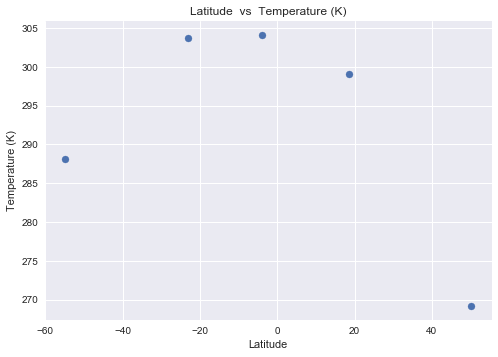

In [72]:
plt.scatter(x=sample_df['lat'],y=sample_df['temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (K)')
plt.title("Latitude vs Temperature")
plt.show()

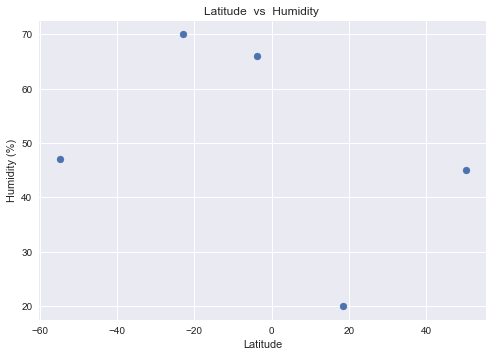

In [73]:
plt.scatter(x=sample_df['lat'],y=sample_df['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity ")
plt.show()

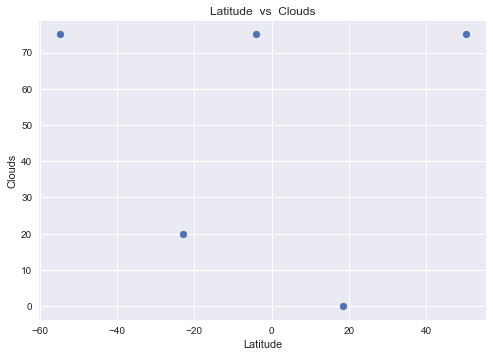

In [74]:
plt.scatter(x=sample_df['lat'],y=sample_df['clouds'])
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title("Latitude vs Clouds")
plt.show()

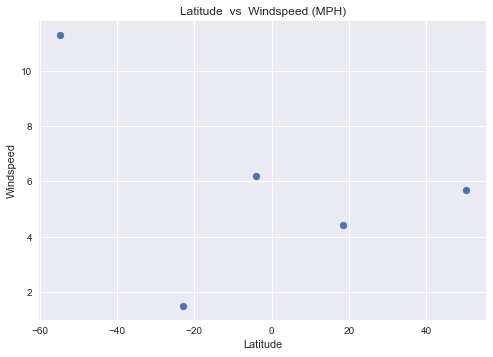

In [75]:
plt.scatter(x=sample_df['lat'],y=sample_df['windspeed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Latitude vs Windspeed (MPH)")
plt.show()